In [1]:
f = read.csv("fit_data_o.csv");

In [2]:
vars = cbind(f$Mod, f$Udl, f$time, f$Pop1, f$Pop10, f$Anime,f$LoreFriendly,f$NotLoreFriendly,f$NotSafeForWork,f$Nudity,f$SexySkimpy,f$Unrealistic,f$ArmorShields,f$Books,f$Clothing,f$ClothingFemale,f$ClothingMale,f$Creatures,f$CreaturesRideable,f$ItemsApparatus,f$ItemsClutter,f$ItemsFurniture,f$ItemsIngredients,f$ItemsLeveled,f$LocationsBuildings,f$LocationsCaverns,f$LocationsDungeons,f$LocationsPlayerOwned,f$LocationsWorldMap,f$MagicEnchantments,f$MagicPotions,f$MagicSpells,f$NPCTrainers,f$NPCVendors,f$NPCs,f$PlantsFoliage,f$Weapons,f$AnimationModified,f$AnimationNew,f$AudioSoundFX,f$AudioVoices,f$Birthsigns,f$Bodymodels,f$Classescomponent,f$EnvironmentOther,f$EnvironmentSky,f$EnvironmentWater,f$EnvironmentWeather,f$Facemodels,f$GuildsFactions,f$Hair,f$LeveledLists,f$Lighting,f$NewLands,f$Newmodels,f$Newtextures,f$Quests,f$RacesModified,f$ScriptedEvents,f$Video,f$Chargen,f$CompanionFriendly,f$Companions,f$Compilation,f$ENBPreset,f$Forfemalecharacters,f$Formalecharacters,f$GameplayEffectsChanges,f$Official,f$PerformanceOptimization,f$Poses,f$Relatedtohorses,f$RelatedtoMoviesTVOtherGames,f$Relatedtovampires,f$Replacer,f$Cheating,f$Fairandbalanced,f$Unbalanced,f$BABBodybase,f$ECHGECBodybase,f$RobertFemaleBodybase,f$RobertMaleBodybase,f$TFFUFFBodybase);
colf = c("Mod", "Udl",'time' ,"Pop1", "Pop10","Anime","LoreFriendly","NotLoreFriendly","NotSafeForWork","Nudity","SexySkimpy","Unrealistic","ArmorShields","Books","Clothing","ClothingFemale","ClothingMale","Creatures","CreaturesRideable","ItemsApparatus","ItemsClutter","ItemsFurniture","ItemsIngredients","ItemsLeveled","LocationsBuildings","LocationsCaverns","LocationsDungeons","LocationsPlayerOwned","LocationsWorldMap","MagicEnchantments","MagicPotions","MagicSpells","NPCTrainers","NPCVendors","NPCs","PlantsFoliage","Weapons","AnimationModified","AnimationNew","AudioSoundFX","AudioVoices","Birthsigns","Bodymodels","Classescomponent","EnvironmentOther","EnvironmentSky","EnvironmentWater","EnvironmentWeather","Facemodels","GuildsFactions","Hair","LeveledLists","Lighting","NewLands","Newmodels","Newtextures","Quests","RacesModified","ScriptedEvents","Video","Chargen","CompanionFriendly","Companions","Compilation","ENBPreset","Forfemalecharacters","Formalecharacters","GameplayEffectsChanges","Official","PerformanceOptimization","Poses","Relatedtohorses","RelatedtoMoviesTVOtherGames","Relatedtovampires","Replacer","Cheating","Fairandbalanced","Unbalanced","BABBodybase","ECHGECBodybase","RobertFemaleBodybase","RobertMaleBodybase","TFFUFFBodybase");

dimnames(vars)[[2]] <- colf
data <- data.frame(vars);

dim(vars)

[1] 26221    83

In [3]:
summary(data);

      Mod             Udl              time           Pop1        
 Min.   :  937   Min.   :     0   Min.   :   6   Min.   :0.00000  
 1st Qu.:11558   1st Qu.:   140   1st Qu.:1799   1st Qu.:0.00000  
 Median :23543   Median :   401   Median :2402   Median :0.00000  
 Mean   :23643   Mean   :  2928   Mean   :2345   Mean   :0.01003  
 3rd Qu.:35806   3rd Qu.:  1299   3rd Qu.:3058   3rd Qu.:0.00000  
 Max.   :46506   Max.   :964238   Max.   :3832   Max.   :1.00000  
     Pop10             Anime           LoreFriendly     NotLoreFriendly   
 Min.   :0.00000   Min.   :0.000000   Min.   :0.00000   Min.   :0.000000  
 1st Qu.:0.00000   1st Qu.:0.000000   1st Qu.:0.00000   1st Qu.:0.000000  
 Median :0.00000   Median :0.000000   Median :0.00000   Median :0.000000  
 Mean   :0.09996   Mean   :0.003356   Mean   :0.06628   Mean   :0.009992  
 3rd Qu.:0.00000   3rd Qu.:0.000000   3rd Qu.:0.00000   3rd Qu.:0.000000  
 Max.   :1.00000   Max.   :1.000000   Max.   :1.00000   Max.   :1.000000  
 NotSa

In [4]:
# Define a function
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max) > level;
  res[sel,sel];
}
hiCor(data,.6)

,Mod,time,Newmodels,Newtextures
Mod,1.00000000,-0.99994608,0.07221064,0.06113647
time,-0.99994608,1.00000000,-0.07222509,-0.06115033
Newmodels,0.07221064,-0.07222509,1.00000000,0.61676566
Newtextures,0.06113647,-0.06115033,0.61676566,1.00000000


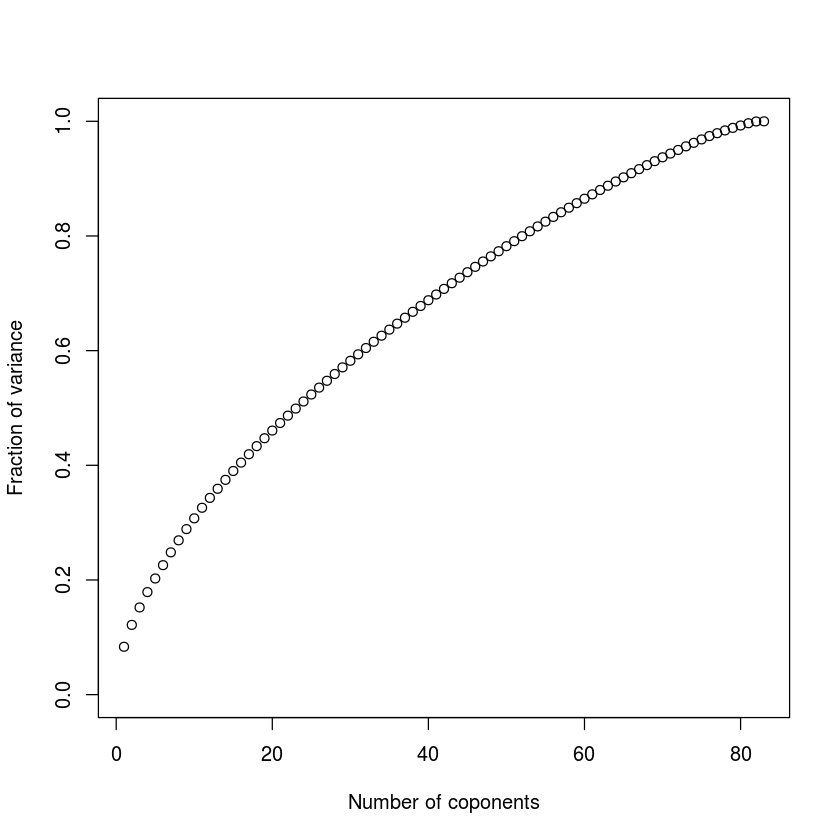

In [6]:
plot(1:83,cumsum(prcomp(vars, retx=F,scale=T)$sdev^2)/sum(prcomp(vars, retx=F,scale=T)$sdev^2),ylim=c(0,1),xlab="Number of coponents",ylab="Fraction of variance");

In [7]:
res<-prcomp(vars, retx=F,scale=T)$rotation[,1:3];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
for (i in 1:3)
  print(t(res[resAbs[,i]>.1,i,drop=FALSE]));

    LoreFriendly ArmorShields     Books  Clothing ClothingMale Creatures
PC1    0.1404027    0.1617794 0.1825489 0.1395919    0.1143648 0.1438494
    ItemsApparatus ItemsClutter ItemsFurniture ItemsIngredients ItemsLeveled
PC1      0.1560757    0.1657103      0.1480298        0.1836393    0.1383731
    LocationsBuildings LocationsCaverns LocationsDungeons LocationsPlayerOwned
PC1          0.1779183        0.1776942         0.1951694            0.1264947
    LocationsWorldMap MagicEnchantments MagicPotions MagicSpells NPCTrainers
PC1         0.1725856         0.1347505     0.164112   0.1242026   0.1623458
    NPCVendors      NPCs PlantsFoliage   Weapons AudioSoundFX AudioVoices
PC1  0.1761744 0.1878492     0.1378434 0.1521781    0.1142174   0.1183178
    GuildsFactions  NewLands Newmodels Newtextures    Quests ScriptedEvents
PC1      0.1454921 0.1516438 0.1448856   0.1459132 0.1794391      0.1509917
    Forfemalecharacters Formalecharacters
PC1           0.1326894         0.1574535
    

In [8]:
modl <- glm(Pop1 ~  time+LoreFriendly+Nudity+ArmorShields+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+Hair+Newmodels+Newtextures+Video+Compilation+GameplayEffectsChanges+PerformanceOptimization+Replacer+Anime+NotLoreFriendly+NotSafeForWork+SexySkimpy+Books+Clothing+LocationsBuildings+LocationsWorldMap+NPCs+PlantsFoliage+Weapons+AudioSoundFX+EnvironmentWeather+GuildsFactions+Quests+Companions+Forfemalecharacters+Formalecharacters+Poses+Cheating+Unbalanced+ECHGECBodybase,family=binomial,data=data);
summary(modl);

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = Pop1 ~ time + LoreFriendly + Nudity + ArmorShields + 
    AnimationModified + AnimationNew + EnvironmentOther + Facemodels + 
    Hair + Newmodels + Newtextures + Video + Compilation + GameplayEffectsChanges + 
    PerformanceOptimization + Replacer + Anime + NotLoreFriendly + 
    NotSafeForWork + SexySkimpy + Books + Clothing + LocationsBuildings + 
    LocationsWorldMap + NPCs + PlantsFoliage + Weapons + AudioSoundFX + 
    EnvironmentWeather + GuildsFactions + Quests + Companions + 
    Forfemalecharacters + Formalecharacters + Poses + Cheating + 
    Unbalanced + ECHGECBodybase, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0398  -0.1345  -0.0785  -0.0440   4.2694  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -1.031e+01  4.237e-01 -24.342  < 2e-16 ***
time                     1.719e-03  1.323e-04  12.999  < 2e-16 ***
LoreFriendly             1

In [9]:
modl2 <- glm(Pop10 ~ time+LoreFriendly+Nudity+ArmorShields+AnimationModified+AnimationNew+EnvironmentOther+Facemodels+Hair+Newmodels+Newtextures+Video+Compilation+GameplayEffectsChanges+PerformanceOptimization+Replacer+Anime+NotLoreFriendly+NotSafeForWork+SexySkimpy+Books+Clothing+LocationsBuildings+LocationsWorldMap+NPCs+PlantsFoliage+Weapons+AudioSoundFX+EnvironmentWeather+GuildsFactions+Quests+Companions+Forfemalecharacters+Formalecharacters+Poses+Cheating+Unbalanced+ECHGECBodybase,family=binomial,data=data);
summary(modl2);

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred


Call:
glm(formula = Pop10 ~ time + LoreFriendly + Nudity + ArmorShields + 
    AnimationModified + AnimationNew + EnvironmentOther + Facemodels + 
    Hair + Newmodels + Newtextures + Video + Compilation + GameplayEffectsChanges + 
    PerformanceOptimization + Replacer + Anime + NotLoreFriendly + 
    NotSafeForWork + SexySkimpy + Books + Clothing + LocationsBuildings + 
    LocationsWorldMap + NPCs + PlantsFoliage + Weapons + AudioSoundFX + 
    EnvironmentWeather + GuildsFactions + Quests + Companions + 
    Forfemalecharacters + Formalecharacters + Poses + Cheating + 
    Unbalanced + ECHGECBodybase, family = binomial, data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.7762  -0.4712  -0.3319  -0.2209   3.2777  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -5.511e+00  1.094e-01 -50.396  < 2e-16 ***
time                     1.035e-03  3.637e-05  28.464  < 2e-16 ***
LoreFriendly             

In [10]:
anova(modl, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,26220,2944.09,NA
time,1,102.3586,26219,2841.732,4.632914e-24
LoreFriendly,1,162.9944,26218,2678.737,2.508643e-37
Nudity,1,65.87024,26217,2612.867,4.816085e-16
ArmorShields,1,26.95029,26216,2585.917,2.087559e-07
AnimationModified,1,75.30976,26215,2510.607,4.023658e-18
AnimationNew,1,21.72371,26214,2488.883,3.148753e-06
EnvironmentOther,1,42.94404,26213,2445.939,5.632833e-11
Facemodels,1,41.68839,26212,2404.251,1.070428e-10
Hair,1,11.40343,26211,2392.848,0.0007330881


In [11]:
anova(modl2, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurred

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,26220,17043.17,NA
time,1,370.9914,26219,16672.18,1.138498e-82
LoreFriendly,1,275.218,26218,16396.96,8.2738e-62
Nudity,1,301.0595,26217,16095.9,1.936149e-67
ArmorShields,1,52.83841,26216,16043.06,3.621487e-13
AnimationModified,1,144.7987,26215,15898.26,2.376654e-33
AnimationNew,1,85.6355,26214,15812.63,2.163557e-20
EnvironmentOther,1,84.01984,26213,15728.61,4.898333e-20
Facemodels,1,55.997,26212,15672.61,7.258151e-14
Hair,1,76.08016,26211,15596.53,2.723796e-18


In [12]:
drop1(modl, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,2104.807,2182.807,NA,NA
time,1,2350.406,2426.406,245.5984,2.366196e-55
LoreFriendly,1,2147.444,2223.444,42.63656,6.591586e-11
Nudity,1,2131.799,2207.799,26.99205,2.042938e-07
ArmorShields,1,2105.693,2181.693,0.8860731,0.3465437
AnimationModified,1,2119.641,2195.641,14.83424,0.0001173852
AnimationNew,1,2113.423,2189.423,8.615529,0.003333089
EnvironmentOther,1,2112.762,2188.762,7.954705,0.004796252
Facemodels,1,2115.533,2191.533,10.72573,0.001056558
Hair,1,2108.335,2184.335,3.527464,0.06036006


In [13]:
drop1(modl2, test="Chi");

Warning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning message:
: glm.fit: fitted probabilities numerically 0 or 1 occurredWarning mess

,Df,Deviance,AIC,LRT,Pr(>Chi)
,NA,14088.7,14166.7,NA,NA
time,1,15096.91,15172.91,1008.213,2.944568e-221
LoreFriendly,1,14135.53,14211.53,46.83612,7.717767e-12
Nudity,1,14182.49,14258.49,93.79177,3.505264e-22
ArmorShields,1,14094.54,14170.54,5.844464,0.01562613
AnimationModified,1,14111,14187,22.29919,2.333054e-06
AnimationNew,1,14136.56,14212.56,47.86328,4.570022e-12
EnvironmentOther,1,14133.49,14209.49,44.79705,2.185513e-11
Facemodels,1,14090.97,14166.97,2.275488,0.1314338
Hair,1,14127.33,14203.33,38.63759,5.102661e-10
